In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Postirior function
def bayesian_dice_updating(data, dice):
    """ Compute the posterior distribution for given dice and data.
    
    :param data: The numbers that have been rolled from the dice
    :type data: list, np.array
    
    :param dice: The range of dices where the number represents 
                 the maximum value that die can take.
    :type dice: list, np.array
    
    :returns: Posterior distribution of the dice given the data
    :rtype: list
    
    """
    
    prior = [1/len(dice) for _ in np.arange(len(dice))]
    
    posterior = prior
    
    for roll in data:
        likelihood = [1/i if i >= roll else 0 for i in dice]
        posterior = np.array(likelihood) * np.array(posterior)
    
    return list(posterior/sum(posterior))
    

In [3]:
# Generate our dice
dice = np.arange(1,51)

In [4]:
# Some rolls
data = [2,4,6]

In [6]:
# Get die with highest probability
dice[np.argmax(bayesian_dice_updating(data, dice))]

6

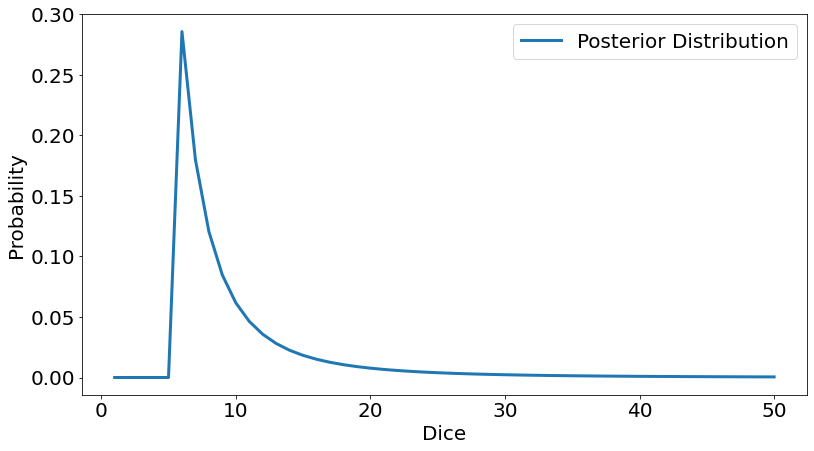

In [9]:
# Plot the probability distribution
plt.figure(figsize=(13,7))
plt.xlabel('Dice', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.plot(dice, bayesian_dice_updating(data, dice), linewidth=3, label='Posterior Distribution')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.savefig('plot.png')
plt.show()

In [7]:
posterior = bayesian_dice_updating(data, dice)

In [8]:
credible_interval_dice =[]
total = 0
credible_interval = 0.95
for prob in posterior:   
    total += prob
    if total <= credible_interval:
        credible_interval_dice.append(prob)

In [ ]:
dice[len(credible_interval_dice)]

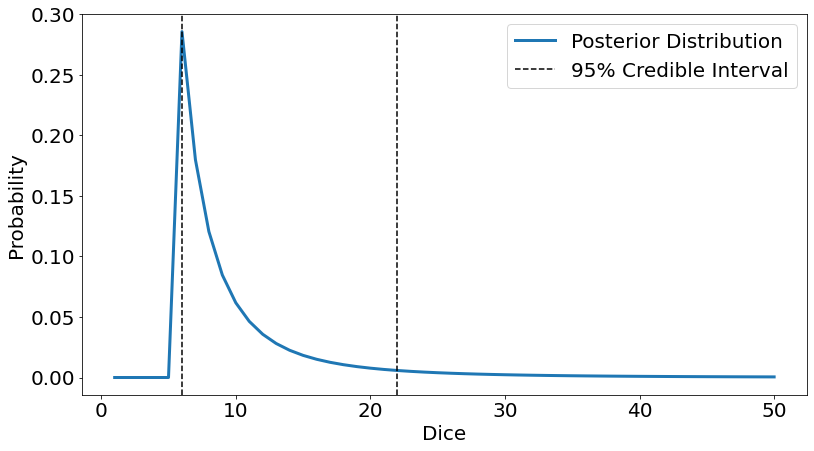

In [5]:
# Plot the probability distribution
plt.figure(figsize=(13,7))
plt.xlabel('Dice', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.plot(dice, bayesian_dice_updating(data, dice), linewidth=3, label='Posterior Distribution')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axvline(6, color='black', linestyle='dashed', label='95% Credible Interval')
plt.axvline(22, color='black', linestyle='dashed')
plt.legend(fontsize=20)
plt.savefig('plot.png')
plt.show()